In [1]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
data = pd.read_csv('../dataset/sentiment_analysis.csv')


In [6]:
data.head(3)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...


In [7]:
data.shape


(7920, 3)

In [8]:
import re
import string


In [9]:
data['tweet'] = data['tweet'].str.lower()

In [10]:
data.head(3)


,id,label,tweet
0,1,0,#fingerprint #pregnancy test https://goo.gl/h1...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...


In [11]:
data['tweet'] = data['tweet'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.MULTILINE))

In [12]:
data.head(3)

,id,label,tweet
0,1,0,#fingerprint #pregnancy test #android #apps #...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...


In [13]:
data['tweet'].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [14]:
import re

data['tweet'] = data['tweet'].apply(lambda x: re.sub(r'[^\w\s]', '', x))


In [15]:
data['tweet'].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [16]:
import re

data['tweet'] = data['tweet'].apply(lambda x: re.sub(r'\d+', '', str(x)))


In [17]:
data['tweet'].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [18]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [19]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [20]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


In [21]:
def remove_stopwords_lemmatize(text):
    words = text.split()  # split into words
    cleaned = []

    for w in words:
        if w not in stop_words:                 # remove stopwords
            cleaned.append(lemmatizer.lemmatize(w))  # lemmatize

    return " ".join(cleaned)


In [22]:
data['tweet'] = data['tweet'].apply(remove_stopwords_lemmatize)


In [23]:
data['tweet'].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    completely love new iphone emojis iphone apple...
7912    tune turn drop gtd one app mobile mind meditat...
7913    ok galaxy crashed one day wait til monday skyr...
7914    gain follower rt must follow follow back follo...
7915    live loud lol liveoutloud selfie smile sony mu...
7916    would like wish amazing day make every minute ...
7917    helping lovely year old neighbor ipad morning ...
7918    finally got smart pocket wifi stay connected a...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [24]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_text(text):
    words = text.split()
    stemmed_words = [stemmer.stem(w) for w in words]
    return " ".join(stemmed_words)
data['tweet'] = data['tweet'].apply(stem_text)


In [25]:
data['tweet'].tail(10)

7910    perfect match instagood applewatch red instagr...
7911         complet love new iphon emoji iphon appl emoj
7912    tune turn drop gtd one app mobil mind medit op...
7913    ok galaxi crash one day wait til monday skyroc...
7914    gain follow rt must follow follow back follow ...
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, dtype: object

In [26]:
from collections import Counter
vocab = Counter()

In [27]:
vocab

Counter()

In [28]:
for sentence in data["tweet"]:
    vocab.update(sentence.split())

In [66]:
vocab

Counter({'iphon': 4162,
         'appl': 2894,
         'samsung': 1419,
         'new': 1141,
         'phone': 1020,
         'follow': 890,
         'soni': 850,
         'ipad': 538,
         'rt': 527,
         'love': 504,
         'like': 463,
         'day': 434,
         'life': 419,
         'app': 416,
         'android': 415,
         'photo': 397,
         'io': 386,
         'get': 384,
         'instagram': 371,
         'galaxi': 366,
         'case': 351,
         'beauti': 331,
         'cute': 330,
         'today': 312,
         'gain': 311,
         'im': 310,
         'work': 307,
         'happi': 300,
         'photographi': 295,
         'back': 294,
         'fuck': 293,
         'game': 285,
         'fun': 282,
         'got': 280,
         'music': 267,
         'news': 265,
         'thank': 264,
         'instagood': 250,
         'time': 249,
         'make': 247,
         'p': 240,
         'smile': 240,
         'updat': 236,
         'go': 231,
      

In [33]:
tokens = {key for key in vocab if vocab[key] > 10}

In [45]:
len(tokens)

1143

In [47]:
def save_vocabulary(lines, filename):
    data= '\n'.join(lines)
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(data)
        f.close()
       
save_vocabulary(tokens, "../dataset/vocab.txt")


In [50]:
x = data["tweet"]
y= data["label"]

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


In [53]:
pip install scikit-learn


  Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.16.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl (8.7 MB)
Using cached scipy-1.16.3-cp313-cp313-win_amd64.whl (38.5 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- ------------------

In [57]:
X_train


4252    cool car wash idea theisland bankholidaymonday...
4428    photo th birthday soni walkman thinkgeek nobod...
7374    ipad biggest pile fuck planet want throw fuck ...
1410    yearbook hmmmmm instagram instagood togeth fri...
7896    piss macbook crash appl compani noth appl macb...
                              ...                        
5226    shana tova jewish newyear everyon may new year...
5390              im sick buy new cell phone charger appl
860     want download free iphon app today spread styl...
7603    photo nikosx iphon beach holiday bw iphon blac...
7270    got iphon hehe iphon appl new final seb wont lose
Name: tweet, Length: 6336, dtype: object

In [58]:
import numpy as np

def vectorizer(ds, vocabulary):
    vectorized_list = []
    for sentence in ds:
        # create a zero vector for the current sentence
        sentence_list = np.zeros(len(vocabulary), dtype=np.float32)

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i] = 1

        vectorized_list.append(sentence_list)

    vectorized_list_new = np.array(vectorized_list, dtype=np.float32)
    return vectorized_list_new


In [60]:
# Convert the set to a list
vocab_list = list(tokens)

# Call the vectorizer
vectorized_x_train = vectorizer(X_train, vocab_list)


In [63]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1143), dtype=float32)

In [64]:
vectorized_x_test = vectorizer(X_test, vocab_list)

In [65]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1143), dtype=float32)

In [67]:
y_test

4896    0
7539    1
1677    0
1964    0
3025    0
       ..
1419    0
3939    0
7834    1
5137    1
4434    0
Name: label, Length: 1584, dtype: int64

In [69]:
print(y_train.value_counts())

label
0    4742
1    1594
Name: count, dtype: int64


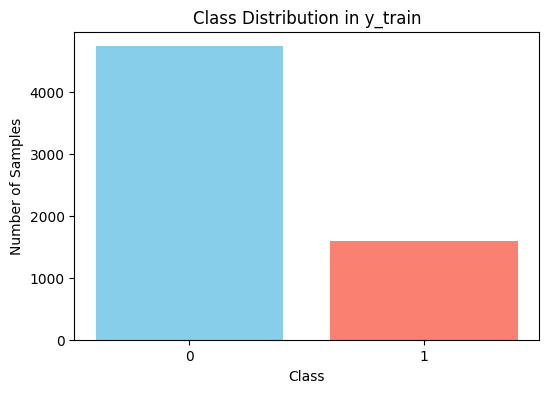

In [71]:
import matplotlib.pyplot as plt

# Count the number of samples in each class
class_counts = y_train.value_counts()

# Plot a bar chart
plt.figure(figsize=(6,4))
plt.bar(class_counts.index, class_counts.values, color=['skyblue', 'salmon'])
plt.xticks([0, 1])  # Ensure x-axis shows 0 and 1
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in y_train")
plt.show()


In [73]:
!pip install imbalanced-learn



In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed

# Fit on training data and transform
X_train_numeric = tfidf.fit_transform(X_train)

# Transform test data
X_test_numeric = tfidf.transform(X_test)


In [80]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_numeric, y_train)

# Check new distribution
print("After SMOTE:")
print(y_train_res.value_counts())


After SMOTE:
label
0    4742
1    4742
Name: count, dtype: int64
